<a href="https://colab.research.google.com/github/youngjinjae/pythontest/blob/main/0731_cat_dog_2%EB%B2%88%EC%A7%B8_%ED%8C%8C%EC%9D%BC_%EC%A0%81%EA%B2%8C_%EB%A7%8C%EB%93%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# csv 파일을 생성 해보자.

# 필요한 모듈을 먼저 설치.
# tqdm, ipywidgets 라는 모듈 필요
# conda install tqdm
# conda install -c conda-forge ipywidgets
# conda install -c conda-forge opencv

import numpy as np
import pandas as pd
from PIL import Image           # 이미지
import matplotlib.pyplot as plt # 그림
import random
import os
import cv2 as cv
from sklearn import utils
from tqdm import tqdm  # import tqdm 으로


In [ ]:
# 파일 경로
train_dir = 'C:/jupyter_home/data/cat_dog/train/'
# 함수를 하나 만들어야합니다. 파일 이름이 cata 이면 0 리턴하고
# 만약 파일이름이 dog 시작하면 1로 리턴
def labeling(img):
    class_name = img.split('.')[0] # dog.0.jpg = > [dof, 0 , jpg ] 나누어줌split
    if class_name == 'cat':return 0
    elif class_name =='dog':return 1

# label data 와 pixel data 담을 변수
x_data = []
t_data = [] # y 아니다.

# 모든 파일에 대해 반복 처리
for img in tqdm(os.listdir(train_dir),
            total=len(os.listdir(train_dir)),
            position=0,
              leave=True):


    # 위에서 정의한 labeling 함수를 이용해서,cat이면 0 dog이면 1반환
    label_data = labeling(img)

    #  이미지 파일에 대한 경로가 필요해요
    path =os.path.join(train_dir,img)
    # 'C:/jupyter_home/data/cat_dog/train/cat.0.jpg' 파일 풀경
    # 경로 중요 path

    # 이미지 파일을 ndarray로 불러옴 (cv2.imread()) -opencv라이브러리
    # 형태만 필요해서 흑백으로 불러옴 -옵션 설정 하면된다.
    # 그리고 pixel에 size는 조절 = > CNN 은 입력 이미지의 크기가 고정시켜서 사용해야함
    # 얼마나 resize를 할지 우리가 결정행
    img_data=cv.resize(cv.imread(path, cv.IMREAD_GRAYSCALE),(80,80))

    # 리스트 변수에 담아요.
    t_data.append(label_data)  # [0,0,0,1,1,1,1,~1] 멍멍리 나오면 1
    x_data.append(img_data.ravel()) #[[],[],[],[]~,[]] 전체 리스트에 1차원으로 사용





100%|██████████████████████████████████████████████████████████████████████████| 25000/25000 [00:19<00:00, 1297.87it/s]


In [ ]:
print(len(t_data))
# 이렇게 만든 x_data와 t_data를 dataFrame 으로 만듬

t_df = pd.DataFrame({
    'label': t_data
})
# display(t_df.head())

x_df = pd.DataFrame(x_data)
# display(x_df.head()) 오래 걸린다.


25000


In [ ]:
# # 2개의 dataframe가 나와요
# # 둘 다 지정 index가 없으니 행 인덱스는 0 부터 숫자로 나옵니다.
# # x_Data , t_data 두개를 0 0 연결 1 1 연결 2 2 연결 merge 기능

# df = pd.merge(t_df, x_df, left_index=True, right_index=True)
# # 둘다 행 인덱스 결합해라 왼쪽 행 index 와 행 index 연겷

# 2개의 DataFrame이 나옴
# 둘 다 지정 index가 없으니 행 인덱스는 0부터 숫자로 나와요


## x_df, t_df 둘 다 행 인덱스를 가지고 merge함
df = pd.merge(t_df, x_df, left_index=True, right_index=True)


## 이렇게 만들면 이미지 파일에 대한 pixcel 데이터를 얻어올 수 있이요
## 그런데 위에서 부터 0~12499까지가 고양이, 12500부터 끝까지가 멍멍이임..
## -> 이상태면 나중에 데이터를 뽑아서 학습? 할때 좋지않음 --> 섞어줘야함
# sklearn의 shuffle기능을 이용해서 DataFrame을 섞어줌
shuffled_df = utils.shuffle(df)


## 이렇게 만든 DataFrame을 CSV파일로 저장
shuffled_df.to_csv('C:/jupyter_home/data/cat_dog/train.csv', index=False)

In [ ]:
# 일부 이미지 분리(총 4000개)

import os, shutil

original_dataset_dir = './data/cat_dog/train'

## directory 생성 ##

base_dir = 'data/cat_dog_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir,'train').replace('\\','/')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation').replace('\\','/')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test').replace('\\','/')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir,'cats').replace('\\','/')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir,'dogs').replace('\\','/')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir,'cats').replace('\\','/')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir,'dogs').replace('\\','/')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir,'cats').replace('\\','/')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir,'dogs').replace('\\','/')
os.mkdir(test_dogs_dir)

## file 복사 ##

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(train_cats_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(validation_cats_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(test_cats_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)


fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(train_dogs_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(validation_dogs_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(test_dogs_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)

In [ ]:
# 위의 결과로
# 폴더를 나누어 이미지 파일들을 저장함
# 총 사용하는 데이터의 양은 학습용 고양잉 멍멍이 합쳐서 2000개
# 테스트용과 validation용으로 고양이 멍멍이 합쳐서 각 1000개
# 처음에 25000개

# 모델의 서능은 전체데이터(25,000개의 이미지)를 사용할 때 보다 좋치는
# 않다 그리고 csv 파일로 저장하는 방식이 아니라 imagedatagenerator라는 걸 이용

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator




Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
(20, 150, 150, 3)
(20,)


<function matplotlib.pyplot.show(close=None, block=None)>

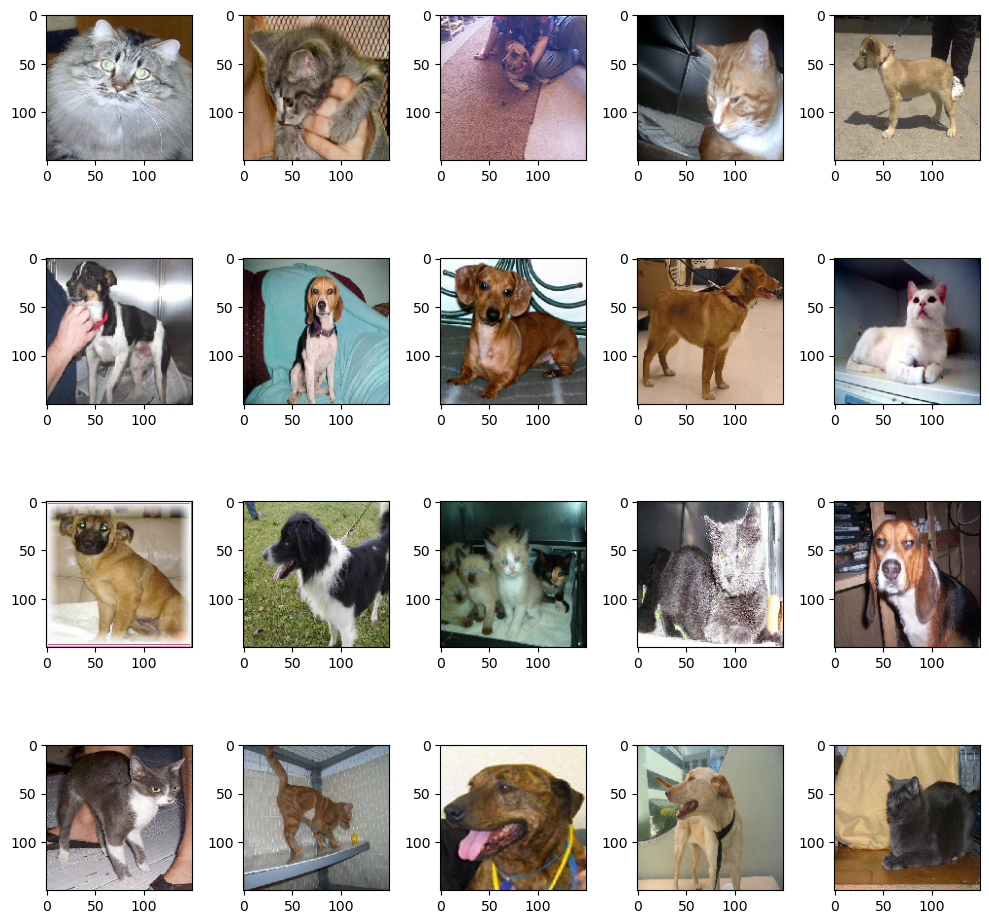

In [ ]:
# 경로 설정
train_dir = './data/cat_dog_small/train'
validation_dir = './data/cat_dog_small/validation'


# imagedatagenerator 생성 하자
# image file 읽어서 pixel 데이터를 추출 generator 2개 만들기
# 모든 이미지 데이터d의 pixel 값을 255 나누어서 scaling = > minmaxscaling
train_datagen=ImageDataGenerator(rescale=1/255)
validation_datagen=ImageDataGenerator(rescale=1/255)


# 이제 generator 이용해서 폴더로 부터 파일을 읽어드리는 generator 생성
# generator 속성을 설정해서 생성

train_generator = train_datagen.flow_from_directory(
    train_dir, # taget directory
    classes=['cats','dogs'],
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir, # taget directory
    classes=['cats','dogs'],
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)


# 두개의 generator 완성 두개이 feneraor 를 만들어씅며,(imagedatagenerator)이용
# generator 생성
# generator 설정 사용해보기
# for 문 이용해서 사용 할 생각이며, 읽어드린 이미지 출력

for x_data, t_data in train_generator:
    print(x_data.shape)
    print(t_data.shape)
    break;

# 이렇게 generator로 가져온 데이터가 정말 이미지 데이터인지 확인해봐야함
fig = plt.figure(figsize=(10,10))
axs=[]

for i in range(20):
    axs.append(fig.add_subplot(4,5,i+1))
for x_data, t_data in train_generator:
    for idx, img_data in enumerate(x_data):
        axs[idx].imshow(img_data)
    break;
fig.tight_layout()
plt.show

In [ ]:
# imagedatagenerator 를 이용해서 특정 폴덜로 부터 이미지를 읽어서
# ndarray를 만들어주는 generator를 정의
# 이제모들 구현을 해보자

# model 구현
model = Sequential()

# feature extranction 부분(convolution, pooling 처리)
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same',
                 input_shape=(150,150,3))) #이미지 변환 same, v # szie () 필요 s 생각하고 숫자
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same',
                 input_shape=(150,150,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same',
                 input_shape=(150,150,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same',
                 input_shape=(150,150,3)))

model.add(MaxPooling2D(pool_size=(2,2)))


# fc layer 입력 넣으면 됨 4차원에 3, 2차원으로
model.add(Flatten()) # 역할 input 역할
# 일반적으로 이쯤에서 dropout 적용
model.add(Dropout(rate=0.5))
# hidden layer도 포함 시킬 수 있다.
model.add(Dense(256,
                 activation='relu'))

# output layer
model.add(Dense(1,activation='sigmoid')) # 2진 분류

print(model.summary())


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 18, 18, 128)     

In [ ]:
# model 설정
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# model 학습
model_result = model.fit(train_generator,
                         steps_per_epoch=100,
                         epochs=30,
                         verbose=1,
                         validation_data = validation_generator,
                         validation_steps=50)

Epoch 1/30
100/100 [==============================] - 34s 339ms/step - loss: 0.6961 - accuracy: 0.5040 - val_loss: 0.6846 - val_accuracy: 0.6260
Epoch 2/30
100/100 [==============================] - 34s 338ms/step - loss: 0.6629 - accuracy: 0.6070 - val_loss: 0.7177 - val_accuracy: 0.5290
Epoch 3/30
100/100 [==============================] - 36s 356ms/step - loss: 0.5989 - accuracy: 0.6800 - val_loss: 0.6016 - val_accuracy: 0.6690
Epoch 4/30
100/100 [==============================] - 32s 318ms/step - loss: 0.5529 - accuracy: 0.7135 - val_loss: 0.5814 - val_accuracy: 0.6910
Epoch 5/30
100/100 [==============================] - 36s 359ms/step - loss: 0.5212 - accuracy: 0.7415 - val_loss: 0.6118 - val_accuracy: 0.6630
Epoch 6/30
100/100 [==============================] - 30s 302ms/step - loss: 0.4953 - accuracy: 0.7575 - val_loss: 0.5411 - val_accuracy: 0.7150
Epoch 7/30
100/100 [==============================] - 36s 356ms/step - loss: 0.4746 - accuracy: 0.7725 - val_loss: 0.5644 - val_ac

In [ ]:
# 전체 데이터를 이용해서 학습을 정확도가 평가하면 약 85% 정확도
# 지금은 그중 일부의 데이터 이용해서 학습하기 때문에
# 당연히 overfitting이 발생하고 정확도가 낮아져요
# 그러면 어덯게 해야하나

# 1. 데이터가 없어서 발생하는 문제니까 데이터를 늘려주면 되잖아요
# 그래서 임의로 데이터를 증식 시킬 수 있어요.
# 내가 가진 이미지를 약간씩 수정해서 이미지의 개수를 늘리는 방법
# image augmentation (이미지 증식)
# 기존이미지에 노이즈를 주는 방식 입니다.
# 이미지 회전, 이미지 확대, 축소 이미지 좌우 이동, 상하좌우 반전 등
# 그러면 이거 어떻게 해야하나요. 포토샵 작업 만들어야하나
# imagedatagenerator 이용하면 간단하게 증식된 이미지를 만들어 낼 수 있다.

# 2. CNN은 이미지의 특성을 추출해서 그 추출된 특성으로 학습 하는거
# 이미지의 특성이 잘 추출되면 학습이 잘된거다.
# 그런데 우리는 학습을 하면서 당연히 filter(특성을 추출하는 매틀릭스)를
# update 하고 있어요. => 이 filter가 아주 잘 만들어진 필터는 아니라는 말이예요.
# 특성을 잘 추출하는 filter를 가져다 쓰면 어떨까?
# 전이 학습 => transfer learning

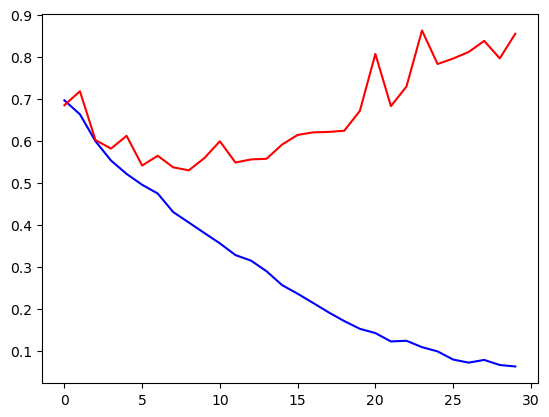

In [ ]:
# history 객체의 내용을 그래프로 표현
plt.plot(model_result.history['loss'],color='b')
plt.plot(model_result.history['val_loss'],color='r')

plt.show()

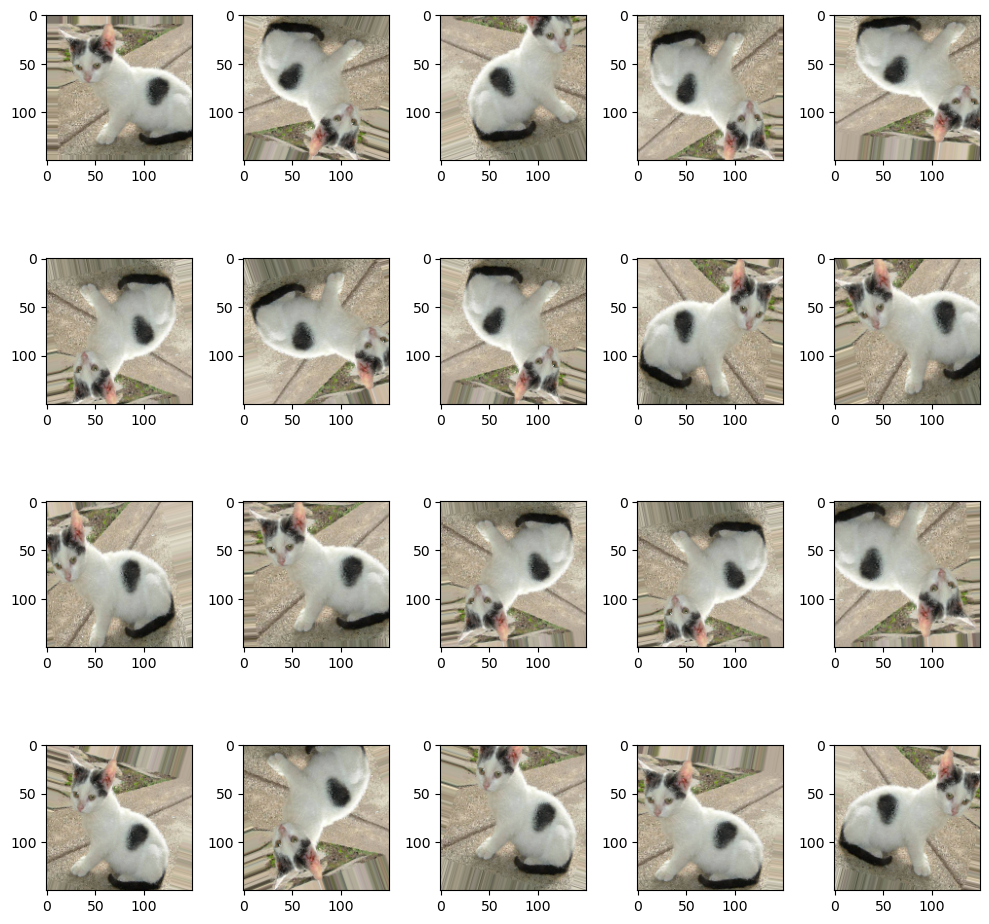

In [ ]:
# 증식에 관한 예제 코드 하나 보자.
# 증식에 관한 예제를 하나 볼꺼예요!

# data augmentation
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

datagen = ImageDataGenerator(rotation_range=20,
                             # 지정된 각도 범위내에서 임의로 원본이미지를 회전
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             # 지정된 방향 이동 범위내에서 임의로 원본이미지를 이동.
                             # 수치는 전체 넓이의 비율(실수)
                             shear_range=0.1,
                             # 밀림 강도 범위내에서 임의로 원본이미지를 변형.
                             # 수치는 시계반대방향으로 밀림 강도를 라디안으로 표시
                             zoom_range=0.1,
                             # 지정된 확대/축소 범위내에서 임의로 원본이미지를 확대/축소.
                             # "1-수치"부터 "1+수치"사이 범위로 확대/축소
                             horizontal_flip=True,
                             vertical_flip=True,
                             # 수평, 수직방향으로 뒤집기.
                             fill_mode='nearest')

img = image.load_img('./data/cat_dog_small/train/cats/cat.3.jpg',
                     target_size=(150,150))

x = image.img_to_array(img)  # (150,150,3)
x = x.reshape((1,) + x.shape) # (1,150,150,3)


fig = plt.figure(figsize=(10,10))
axs = []

for i in range(20):
    axs.append(fig.add_subplot(4,5,i+1))

idx = 0
for batch in datagen.flow(x, batch_size=1):
    imgplot = axs[idx].imshow(image.array_to_img(batch[0]))
    idx += 1
    if idx % 20 == 0:
        break

fig.tight_layout()
plt.show()

In [ ]:
# 적은 데이터를 가지고 증식을 이용해서
# 아까 학습한 내용을 다시 진행하서 결과 그래프를 확인해보면 될거 같아요


